In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

from operator import itemgetter  

from sklearn.metrics import plot_confusion_matrix

import os

# Hanno pred

In [2]:
hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_aug_last.csv" #hanno_icu_selected_preproc_last.csv"
hanno_non_icu_feat_path = "./output/hanno_non_icu_selected_preproc_aug_last.csv" #hanno_non_icu_selected_preproc_last.csv"

In [3]:
hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

print(hanno_icu_feat.shape) 

(500, 18)


In [4]:
hanno_non_icu_feat = pd.read_csv(hanno_non_icu_feat_path)
hanno_non_icu_feat = hanno_non_icu_feat.iloc[:,1:].to_numpy()

print(hanno_non_icu_feat.shape)

(486, 18)


In [5]:
#concatenate
last_features = np.concatenate((hanno_icu_feat, hanno_non_icu_feat), axis=0)
print(last_features.shape)

#normalize
hanno_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(hanno_features_norm.shape)

hanno_features_norm[np.isnan(hanno_features_norm)] = 0

(986, 18)
(986, 18)


In [6]:
Y_hanno = np.zeros((last_features.shape[0],))
Y_hanno[0:hanno_icu_feat.shape[0],] = 1
Y_hanno.shape

(986,)

In [7]:
features = hanno_features_norm

max_depth_tree = 4
min_samples_leaf = 20
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

clf = clf.fit(features, Y_hanno)
y_pred = clf.predict(hanno_features_norm)

print(classification_report(Y_hanno, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83       486
         1.0       0.80      0.92      0.86       500

    accuracy                           0.84       986
   macro avg       0.85      0.84      0.84       986
weighted avg       0.85      0.84      0.84       986



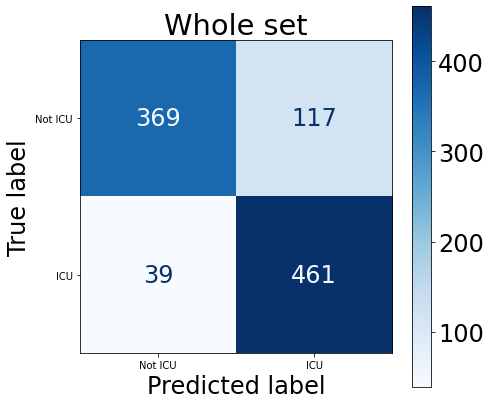

In [8]:
clf_= clf #clf_logit

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})


disp = plot_confusion_matrix(clf_, features, Y_hanno,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)

disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);

## Cross-val

In [9]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y_hanno, cv=35)

print(confusion_matrix(Y_hanno, cv_scores))
print(classification_report(Y_hanno, cv_scores))

[[357 129]
 [ 79 421]]
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       486
         1.0       0.77      0.84      0.80       500

    accuracy                           0.79       986
   macro avg       0.79      0.79      0.79       986
weighted avg       0.79      0.79      0.79       986



# Severity scoring

## Fit classifier based on Cohen's

In [58]:
last_features_class1_path = "./output/went_icu_sel_proc_aug_last.csv" #"./output/1-2_icu_18feat.csv"
last_features_class2_path = "./output/not_went_icu_sel_proc_aug_last.csv" #"./output/1-2_not_icu_18feat.csv"

In [59]:
last_features_class1 = pd.read_csv(last_features_class1_path)
last_features_class1 = last_features_class1.iloc[:,1:].to_numpy()

print(last_features_class1.shape)

last_features_class2 = pd.read_csv(last_features_class2_path)
last_features_class2 = last_features_class2.iloc[:,1:].to_numpy()

print(last_features_class2.shape)

#concatenate
last_features = np.concatenate((last_features_class1, last_features_class2), axis=0)
print(last_features.shape)

#normalize
last_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(last_features_norm.shape)

Y = np.zeros((last_features.shape[0],))
Y[0:last_features_class1.shape[0],] = 1
Y.shape

features = last_features_norm
#features_names_ = feature_names

(455, 18)
(585, 18)
(1040, 18)
(1040, 18)


In [60]:
from sklearn.linear_model import LogisticRegression, LinearRegression

clf_logit = LogisticRegression(random_state=0).fit(features, Y) 
#clf_lin = LinearRegression().fit(features, Y) #[:,[4, 2, 16, 11, 15]]

In [61]:
dataset_path = './datasets/hanno_repo'
metadata = pd.read_csv(os.path.join(dataset_path,'data.csv'))

In [62]:
id_img_patient = metadata['patient_id'].values
print('no of samples =', len(id_img_patient))

no of samples = 243


In [63]:
lst_of_patients = np.unique(id_img_patient)
print('no of unique patients =',len(lst_of_patients))

no of unique patients = 71


In [67]:
#Load features
hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"
#hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"

hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

#normalize
hanno_icu_feat_norm = (hanno_icu_feat - hanno_icu_feat.mean(axis=0)) / hanno_icu_feat.std(axis=0)  


#Load images ids
images_id_path = './output/hanno_icu_selected_preproc_last.txt'
with open(images_id_path) as imgs_id:
    imgs_ids = imgs_id.read().split(',')

,patient_id,image_id,sex,age,size,weight,admission_offset,icu_admission_offset,icu_release_offset,death_offset,...,ldh_offset,ldh_val,lymphocytes_offset,lymphocytes_val,neutrophils_offset,neutrophils_val,pco2_offset,pco2_val,po2_offset,po2_val
35,271ddf1a,ffe8b4cb,m,NaN,NaN,NaN,0,0.0,14.0,NaN,...,0.0,280.0,NaN,NaN,NaN,NaN,0.0,30.0,0.0,60.0
36,271ddf1a,c08a4f41,m,NaN,NaN,NaN,-3,-3.0,11.0,NaN,...,0.0,240.0,NaN,NaN,NaN,NaN,0.0,50.0,0.0,65.0
37,271ddf1a,6c5b3802,m,NaN,NaN,NaN,-5,-5.0,9.0,NaN,...,-2.0,240.0,NaN,NaN,NaN,NaN,0.0,50.0,0.0,70.0
38,271ddf1a,d22964a4,m,NaN,NaN,NaN,-6,-6.0,8.0,NaN,...,-3.0,240.0,14.0,2.7,14.0,5.2,0.0,45.0,0.0,85.0
39,271ddf1a,262a70ca,m,NaN,NaN,NaN,-7,-7.0,7.0,NaN,...,3.0,205.0,13.0,2.7,13.0,5.2,-1.0,30.0,-1.0,70.0
40,271ddf1a,19abe1f3,m,NaN,NaN,NaN,-20,-20.0,-6.0,NaN,...,-3.0,275.0,0.0,2.7,0.0,5.2,-1.0,30.0,-1.0,35.0


Patient no 13 has 6 images. 5 availiable
image ffe8b4cb - score: 0.6229082488635285
image c08a4f41 - score: 0.6504158871894239
image 6c5b3802 - score: 0.42299700349083796
image d22964a4 - score: 0.41303814511933695
image 262a70ca - score: 0.5196123812874015
img 19abe1f3 not in selected dir


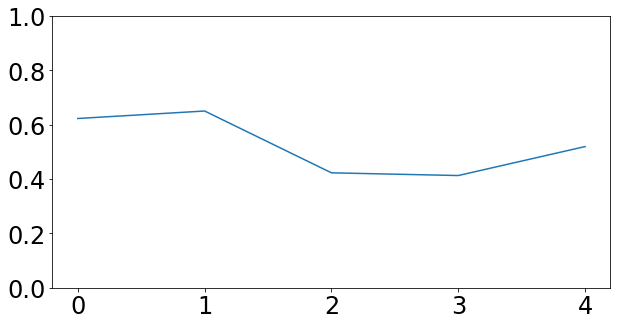

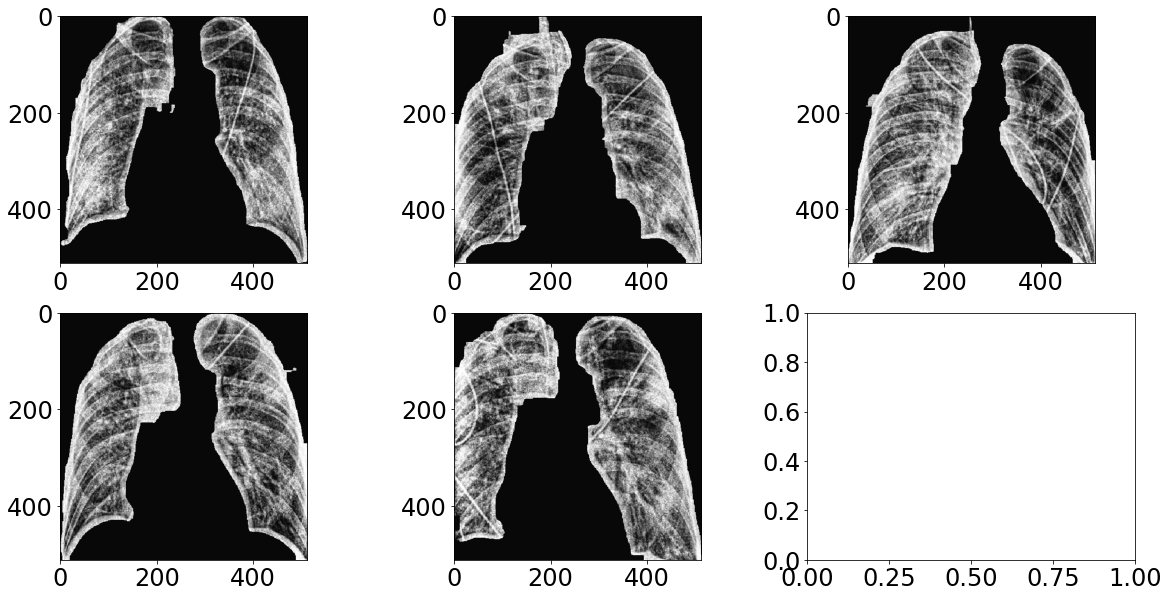

In [71]:
import matplotlib.image as mpimg

#hanno_img_dir = "output/hanno_icu_selected/"
hanno_img_dir =  "output/hanno_icu_selected_preproc/"
imgs_hanno = os.listdir(hanno_img_dir)

idx_patient = 13
#idx_patient+=1

#check metadata
imgs_from_patient = metadata['image_id'][metadata['patient_id']==lst_of_patients[idx_patient]].values
display(metadata[metadata['patient_id']==lst_of_patients[idx_patient]])
imgs_in_dir = [i for i in imgs_from_patient if (i + '.png') in imgs_hanno]

print('Patient no',str(idx_patient) ,'has',len(imgs_from_patient),'images.',  len(imgs_in_dir), 'availiable')

#Predict score
scores=[]
indexes=[]
for idx_img, img in enumerate(imgs_from_patient):
    if (img + '.png') in imgs_hanno:
             
        index = imgs_ids.index(img + '.png')

        score = clf_logit.predict_proba(hanno_icu_feat_norm)[index][1]
    
        #scores.append(score[1])
        scores.append(score)
        indexes.append(index)
   
        print('image', img,'-','score:',score)
    else:
        print('img', img, 'not in selected dir')

#plot scores
fig, ax = plt.subplots(figsize=(10,5))
ax.set_ylim(0,1)
plt.plot(scores)

n_col = 3

if len(indexes) > 0:
    fig, axs = plt.subplots(int(np.ceil(len(indexes)/n_col)), n_col, figsize=(20, 10))

    for i, idx in enumerate(indexes):
        try:
            img = mpimg.imread(os.path.join(hanno_img_dir,imgs_ids[idx]))    
            if int(np.ceil(len(indexes)/n_col)) > 1:
                axs[int(i/n_col),i-(int(i/n_col)*n_col)].imshow(img)
                #axs[int(i/n_col),i-(int(i/n_col)*n_col)].set_title(imgs_ids[idx])
            else:
                axs[i-(int(i/n_col)*n_col)].imshow(img)
        except:
            pass
                 
                 
    

In [49]:
# def running_mean(x, N):
#     cumsum = np.cumsum(np.insert(x, 0, 0)) 
#     return (cumsum[N:] - cumsum[:-N]) / float(N)

# run_mean = running_mean(scores,3)

# fig, ax = plt.subplots(figsize=(10,10))
# ax.set_ylim(0,1)
# plt.plot(run_mean)

## Grouping test

In [72]:
# load metadata 
#dataset_path = './datasets/hanno_repo'
dataset_path = './output/'
#metadata = pd.read_csv(os.path.join(dataset_path,'data.csv'))
metadata = pd.read_csv(os.path.join(dataset_path,'hanno_metadata.csv'))
metadata.head()

,patient_id,image_id,sex,age,size,weight,admission_offset,icu_admission_offset,icu_release_offset,death_offset,...,ldh_offset,ldh_val,lymphocytes_offset,lymphocytes_val,neutrophils_offset,neutrophils_val,pco2_offset,pco2_val,po2_offset,po2_val
0,024e7871,fff13f3a,f,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0.0,1.8,0.0,3.1,0.0,30.0,0.0,30.0
1,042f06a9,b343e657,m,NaN,NaN,NaN,0,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45.0,0.0,55.0
2,042f06a9,c9280a30,m,NaN,NaN,NaN,-2,-2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,40.0,-1.0,80.0
3,042f06a9,53c9be49,m,NaN,NaN,NaN,-5,-5.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,35.0,-1.0,105.0
4,04a33bab,6b5af975,m,NaN,NaN,NaN,0,0.0,0.0,NaN,...,0.0,295.0,0.0,2.7,0.0,6.2,0.0,30.0,0.0,165.0


In [73]:
# make group of patients - before admission - vicinity of admission - vicinity of release - after release

group_boundary = 2 #days

## no icu data
patients_no_icu_data = metadata[metadata["icu_admission_offset"].isnull()]['image_id'].values
print(len(patients_no_icu_data),'patients without icu data')

## before adimission
patients_b4_adm = metadata[metadata["icu_admission_offset"]>=group_boundary]['image_id'].values
print(len(patients_b4_adm),'patients before admission')

## vicinity of admission
patients_vic_adm = metadata[(metadata["icu_admission_offset"]<group_boundary) & (metadata["icu_admission_offset"]>-group_boundary)]['image_id'].values
print(len(patients_vic_adm),'patients in vicinity of admission')

## in icu
patients_in_icu = metadata[(metadata["icu_admission_offset"]<0) & (metadata["icu_release_offset"]>0)]['image_id'].values
print(len(patients_in_icu),'patients in icu')

## vicinity of release
patients_vic_rel = metadata[(metadata["icu_release_offset"]<group_boundary) & (metadata["icu_release_offset"]>-group_boundary)]['image_id'].values
print(len(patients_vic_rel),'patients in vicinity of release')

## after release
patients_after_rel = metadata[metadata["icu_release_offset"]<=-group_boundary]['image_id'].values
print(len(patients_after_rel),'patients after release')

patients_group_ids = {}
patients_group_ids['no_icu'] = patients_no_icu_data
#patients_group_ids['b4_adm'] = patients_b4_adm
patients_group_ids['vic_adm'] = patients_in_icu
patients_group_ids['in_icu'] = patients_vic_adm
patients_group_ids['vic_rel'] = patients_vic_rel
#patients_group_ids['after_rel'] = patients_after_rel

57 patients without icu data
6 patients before admission
37 patients in vicinity of admission
112 patients in icu
31 patients in vicinity of release
25 patients after release


In [74]:
# load features

hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"
hanno_non_icu_feat_path = "./output/hanno_non_icu_selected_preproc_last.csv"

hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

hanno_non_icu_feat = pd.read_csv(hanno_non_icu_feat_path)
hanno_non_icu_feat = hanno_non_icu_feat.iloc[:,1:].to_numpy()

hanno_features = np.concatenate((hanno_icu_feat, hanno_non_icu_feat), axis=0)
hanno_features_norm = (hanno_features - hanno_features.mean(axis=0)) / hanno_features.std(axis=0)  

hanno_features_norm[np.isnan(hanno_features_norm)] = 0

In [75]:
# calculate scores

## fit classifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

clf_logit = LogisticRegression(random_state=0).fit(features, Y) 

#calculate scores
group_scores = {}
for group in patients_group_ids:
    group_scores[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            group_scores[group].append(clf_logit.predict_proba(hanno_features_norm)[index][1])
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_scores

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


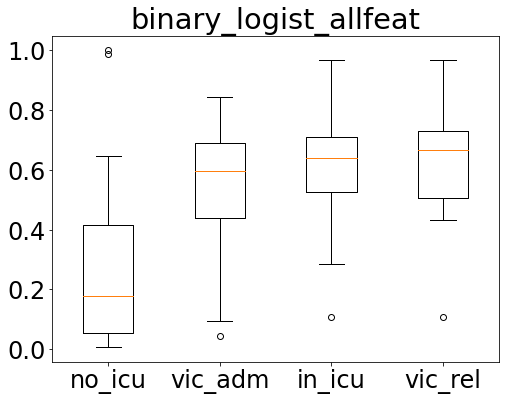

In [76]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores[group] for group in group_scores])
#ax1.boxplot(group_scores['vic_rel'])
ax1.set_title('binary_logist_allfeat')
fontdict = {'fontsize': 14,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores.keys()))#, fontdict=fontdict)

plt.show()

### Cohen severity comparison

In [77]:
cohen_sev_dir = './output'
sev_files = {'geo_ext': 'geo_ext.txt',
             'opacity': 'opct.txt'}

sev_files_scores = {}

for file_ in sev_files:
    with open(os.path.join(cohen_sev_dir,sev_files[file_])) as sev_scores:
        #imgs_ids = 
        sev_files_scores[file_] = sev_scores.read().split('\n')
        sev_files_scores[file_].pop(-1)
        sev_files_scores[file_] = [float(i) for i in sev_files_scores[file_]]

In [78]:
# group scores

metric = 'geo_ext' #'opacity'

group_scores = {}
for group in patients_group_ids:
    group_scores[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            group_scores[group].append(sev_files_scores[metric][index])
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_scores

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


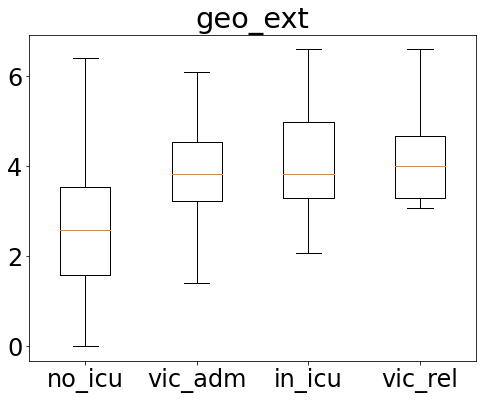

In [79]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores[group] for group in group_scores])
#ax1.boxplot(group_scores['vic_rel'])
ax1.set_title('geo_ext')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores.keys()))#, fontdict=fontdict)

plt.show()

In [80]:
# group scores

metric = 'opacity'

group_scores = {}
for group in patients_group_ids:
    group_scores[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            group_scores[group].append(sev_files_scores[metric][index])
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_scores

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


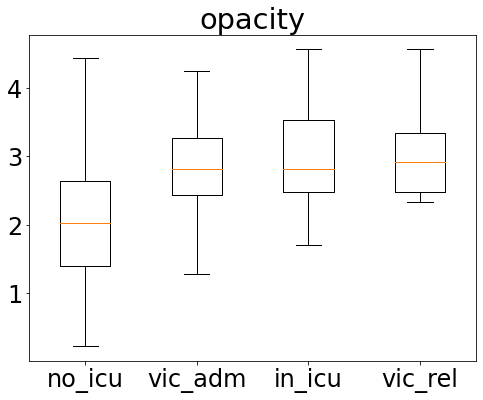

In [81]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores[group] for group in group_scores])
#ax1.boxplot(group_scores['vic_rel'])
ax1.set_title('opacity')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores.keys()))#, fontdict=fontdict)

plt.show()

## brescia comparison

In [82]:
import json 

score_path = './output/brescia_score.json'

with open(score_path) as f:
    brescia_scr = json.load(f)
    
brescia_scr['image_id'] = [i[:-4] for i in brescia_scr['image_id']]

In [83]:
# group scores

#metric = 'opacity'

group_scores = {}
for group in patients_group_ids:
    group_scores[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0

    for patient_id in patients_group_ids[group]:
        if (patient_id + '.png') in imgs_hanno:
            if patient_id in brescia_scr['image_id']:
                #count += 1
                valid_flag += 1
                group_scores[group].append(brescia_scr['score'][brescia_scr['image_id'].index(patient_id)])
                
    print('group {0} has {1} valid images'.format(group,valid_flag))

            
                

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


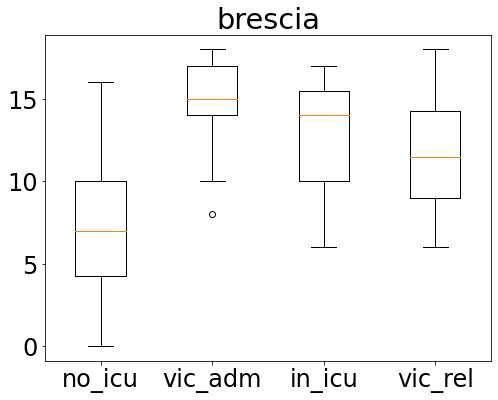

In [84]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores[group] for group in group_scores])
#ax1.boxplot(group_scores['vic_rel'])
ax1.set_title('brescia')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores.keys()))#, fontdict=fontdict)

plt.show()